# Standard Imports

In [247]:
import pandas as pd
import numpy as np
import re
import scipy.stats
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
import seaborn as sns
import CPTAC.Endometrial as CPTAC

### Designating CPTAC Variables

In [248]:
somatic = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
transcriptomics = CPTAC.get_transcriptomics()

### Designating a List of TP53 Hotspot Mutations Found in a Previous Analysis

In [249]:
# A list of mutations present in the hotspot according to our Hotspot3D output
gene = 'TP53'
hotspot_mutations = ['p.P250L', 'p.R248W', 'p.S241C', 'p.241del','p.K164E', 'p.R249S', 'p.R273H', 'p.R282W','p.S127Y', 'p.G244D', 'p.A159P']
mutated_hotspot = somatic.loc[(somatic['Location'].isin(hotspot_mutations)) & (somatic['Gene'] == gene)]
hotspot_patients = mutated_hotspot['Clinical_Patient_Key']

## All TP53 Mutations vs Wildtype Analysis

### Significant proteins that are significant in only one data set

In [250]:
# Creating a list for the unique correlations in all TP53 mutants vs wildtype analysis
all_mut_prot_array = np.array(['AES', 'AKAP8L', 'BIN3', 'BIRC2', 'BUB1B', 'CBS', 'CDK11B', 'CDYL', 'CEBPZ', 'CHD4', 'COPS4', 'CRADD', 'DDX18', 'DDX39A', 'DDX52', 'DLG5', 'DLGAP5', 'ECT2', 'EIF4G1', 'ESF1', 'FBXO22', 'FMN1', 'FXR1', 'GEMIN2', 'GFM1', 'GMPR2', 'GMPS', 'HEATR1', 'HMCES', 'IFIT2', 'KDM2A', 'KIF2C', 'KIFC1', 'MDC1', 'MTUS1', 'NAA25', 'NCL', 'NOL11', 'NOL7', 'NOM1', 'OAS3', 'PA2G4', 'PAK2', 'PAXX', 'PBLD', 'PDCD11', 'PICK1', 'PLCE1', 'PRRC2A', 'PSMD5', 'PTAR1', 'PTPN2', 'PUF60', 'RAB5IF', 'RABL6', 'RBBP6', 'RCC2', 'RIF1', 'RRP1B', 'RRP36', 'SCRN3', 'SDF2', 'SEC16A', 'SEPSECS', 'SGSM3', 'SMG1', 'SMPD1', 'TAF2', 'TOLLIP', 'TOP1', 'TOP2A', 'TPX2', 'TRAF3IP2', 'TRIM2', 'TRIP13', 'TRMT10C', 'TRMT6', 'TTC4', 'UBR5', 'USP47', 'UTP3', 'UTP4', 'VPS13C', 'VPS25', 'VPS36', 'VRK1', 'WDR43', 'WDR75', 'XPO1', 'XRN1', 'ZC3H8', 'ZCCHC17', 'ZNF217', 'ZNF622'])
all_mut_tran_array = np.array(['AAMP', 'ABCF3', 'ABHD16B', 'ABHD18', 'ACAD9', 'ACAP2', 'ADAM17', 'ADRM1', 'AEN', 'AIP', 'ALG3', 'ANKFN1', 'ANKHD1-EIF4EBP3', 'ANKLE1', 'ANKRA2', 'ANKRD27', 'AP2M1', 'ARFGAP1', 'ARFRP1', 'ARHGAP26-IT1', 'ARMC8', 'ARSD', 'ATAD3B', 'ATL2', 'AURKA', 'BABAM1', 'BAK1', 'BBS4', 'BYSL', 'C20orf27', 'C6orf106', 'C9orf152', 'CABLES2', 'CASC4', 'CCDC124', 'CDCA8', 'CDK5RAP1', 'CDKN1A', 'CENPA', 'CENPO', 'CHRAC1', 'CKS1B', 'CLCN2', 'COG3', 'COL28A1', 'COLCA1', 'COLCA2', 'COLGALT1', 'CSNK2A1', 'CSNK2B', 'CSTF1', 'CTCFL', 'CTNNBL1', 'CYB5D2', 'DAXX', 'DCAF15', 'DERL1', 'DHX16', 'DNAJB11', 'DNMBP', 'DPH2', 'E2F1', 'E2F3', 'EEFSEC', 'EFL1', 'EHMT2', 'EIF4A3', 'ERCC3', 'ERCC6L2', 'ERI3', 'ERICH3', 'ESPL1', 'FAAP24', 'FAM131A', 'FAM149A', 'FAM214A', 'FAM219B', 'FAM83D', 'FBXO45', 'FGF21', 'FKBPL', 'FNDC7', 'FSD1', 'FYTTD1', 'GALNT7', 'GGCX', 'GID8', 'GMEB2', 'GOLGA1', 'GPATCH3', 'GPN1', 'GRAMD2B', 'GSTM2P1', 'GTF3C2', 'GTPBP3', 'HAUS5', 'HMGA1', 'HNF4G', 'HPDL', 'HSD17B4', 'HSDL2', 'HSF2BP', 'HSP90AB1', 'IDH3B', 'IFI44L', 'IFT88', 'IGF2BP1', 'IL20RA', 'INVS', 'IRF7', 'ISY1', 'ISYNA1', 'KBTBD4', 'KIAA1324', 'KIF27', 'KLHDC3', 'KPNA1', 'KPNA4', 'LAMP3', 'LEMD2', 'LINC00271', 'LNP1', 'LOC100128966', 'LOC101927391', 'LOC283177', 'LOC285191', 'LOC399815', 'LOC728485', 'LRP2BP', 'MAGEF1', 'MAN2A1', 'MAP6D1', 'MAPRE1', 'MARVELD2', 'MAST1', 'MCM8', 'MDM2', 'MED20', 'MEGF9', 'MEIOB', 'MGME1', 'MIIP', 'MIS18A', 'MRAP2', 'MRPL2', 'MRPL3', 'MRPL4', 'MSX1', 'MTBP', 'MTCH1', 'MTFR2', 'MTG2', 'MYCL', 'NAA50', 'NCBP2', 'NCBP2-AS2', 'NEIL1', 'NELFCD', 'NMRK1', 'NOP56', 'NPBWR2', 'NR2F6', 'NT5E', 'NUP155', 'NXT1', 'OASL', 'OR5H6', 'OSBPL2', 'PARL', 'PBX2', 'PDRG1', 'PEPD', 'PFDN4', 'PFDN6', 'PGR', 'PHKB', 'PIGU', 'PIK3R4', 'PNO1', 'POLK', 'POLQ', 'PSMA7', 'PSMD2', 'PSMF1', 'PSPC1', 'RAB14', 'RAD21', 'RALY', 'RBM42', 'RFC4', 'RNF114', 'RNF168', 'RNF26', 'RPP40', 'RPRD1B', 'RPS27L', 'RRAGC', 'RSAD2', 'RTF2', 'SECISBP2', 'SECISBP2L', 'SENP5', 'SESN1', 'SGCB', 'SHKBP1', 'SKIV2L', 'SLC30A6', 'SMIM13', 'SMPD4', 'SNORA93', 'SNRNP200', 'SNRPB', 'SNRPB2', 'SNRPC', 'SOX11', 'SPATA18', 'SPATA6', 'SPDEF', 'SPG11', 'SPNS1', 'SS18L1', 'SSSCA1', 'STX17', 'SUMO3', 'TAF11', 'TAF4', 'TBC1D31', 'TBL1XR1', 'TET2', 'TFG', 'THEMIS2', 'TIGD4', 'TIRAP', 'TLE6', 'TM9SF4', 'TMC5', 'TMEM147', 'TMEM41A', 'TMEM62', 'TNK2', 'TOMM40', 'TRAIP', 'TRIM13', 'TRIM32', 'TRIM39', 'TRMO', 'TRPC4AP', 'TTC12', 'TTC23', 'TTC38', 'TUBA1C', 'UBE2S', 'UBR1', 'UCKL1', 'UNC5C', 'UQCC2', 'USE1', 'WDR46', 'WDR53', 'WRNIP1', 'XPA', 'XPC', 'YEATS2', 'YY1', 'ZBTB9', 'ZFAT', 'ZFP64', 'ZNF165', 'ZNF280D', 'ZNF850', 'ZSWIM1', 'ZXDC', 'ZYG11A'])

# Ensuring that the list of significant proteins have data in both the proteomics and transcriptomics dataframe
all_mut_prot_list = list()
for protein in all_mut_prot_array:
    if protein in proteomics.columns and protein in transcriptomics.columns:
        all_mut_prot_list.append(protein)
    all_mut_prot_array = np.array(all_mut_prot_list)
    
all_mut_tran_list = list()
for protein in all_mut_tran_array:
    if protein in proteomics.columns and protein in transcriptomics.columns:
        all_mut_tran_list.append(protein)
    all_mut_tran_array = np.array(all_mut_tran_list)
    
all_unique_array = np.concatenate((all_mut_prot_array, all_mut_tran_array))

In [251]:
# Creating dataframes for the unique proteins in all mutants vs wildtype for both the proteome and transcriptome
all_unique = pd.DataFrame({'Protein':all_mut_unique_array})
all_unique = all_unique.set_index('Protein')
all_unique.loc[all_mut_prot_array, 'Sig_Loc'] = 'Proteomics'
all_unique.loc[all_mut_tran_array, 'Sig_Loc'] = 'Transcriptomics'
all_unique = all_unique.reset_index()

In [252]:
for protein in all_unique_array:
    proteome_data = CPTAC.compare_mutations(proteomics, protein, gene)
    transcriptome_data = CPTAC.compare_mutations(transcriptomics, protein, gene)
    # Renaming columns to relfect where the data is from (proteome or transcriptome) for the given protein
    proteome_data.columns = ['Proteome', 'Mutation', 'Sample_Status']
    transcriptome_data.columns = ['Transcriptome', 'Mutation', 'Sample_Status']
    all_data = proteome_data.join(transcriptome_data['Transcriptome'])
    all_data.loc[all_data['Sample_Status'] == 'Tumor', 'Mutation_Type'] = 'Non_Hotspot'
    all_data.loc[hotspot_patients, 'Mutation_Type'] = 'Hotspot'
    all_data.loc[all_data['Mutation'] == 'Wildtype_Tumor', 'Mutation_Type'] = 'Wildtype'
    all_data = all_data.loc[all_data['Sample_Status'] == 'Tumor'].dropna(axis=0)
    
    # Gathering mean value difference from the transcriptomics data
    t_mut_mean = all_data.loc[all_data['Mutation_Type'] != 'Wildtype', 'Transcriptome'].mean()
    t_wt_mean = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Transcriptome'].mean()
    t_dif = t_wt_mean - t_mut_mean
    all_unique.loc[all_unique['Protein'] == protein, 'Transcriptome_Mean_Difference'] = t_dif
    # Gathering p-value from the transcriptomics data
    t_mut_tt = all_data.loc[all_data['Mutation_Type'] != 'Wildtype', 'Transcriptome']
    t_wt_tt = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Transcriptome']
    t_tt = scipy.stats.ttest_ind(t_wt_tt, t_mut_tt)
    all_unique.loc[all_unique['Protein'] == protein, 'Transcriptome_pvalue'] = t_tt[1]
    
    # Gathering mean value difference from the proteomics data
    p_mut_mean = all_data.loc[all_data['Mutation_Type'] != 'Wildtype', 'Proteome'].mean()
    p_wt_mean = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Proteome'].mean()
    p_dif = p_wt_mean - p_mut_mean
    all_unique.loc[all_unique['Protein'] == protein, 'Proteome_Mean_Difference'] = p_dif
    #Gathering p-value from the proteomics data
    p_mut_tt = all_data.loc[all_data['Mutation_Type'] != 'Wildtype', 'Proteome']
    p_wt_tt = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Proteome']
    p_tt = scipy.stats.ttest_ind(t_wt_tt, t_mut_tt)
    all_unique.loc[all_unique['Protein'] == protein, 'Proteome_pvalue'] = p_tt[1]
    

### Significant proteins that are significant in both data sets

In [253]:
# Creating arrays for the shared correlations in both directions for TP53 mutants vs wildtype
all_mut_shared_pos_array = np.array(['ABCF1', 'ABT1', 'ATAD2', 'CAD', 'CDKAL1', 'CIP2A', 'CMPK2', 'CMSS1', 'CMTR1', 'CSE1L', 'DDX27', 'EIF2AK2', 'GRB7', 'HELZ2', 'HERC5', 'IFIT1', 'IRF2BPL', 'ISG15', 'KLRG2', 'KRI1', 'LSG1', 'LSM14B', 'MRGBP', 'MTHFD2', 'MX1', 'MX2', 'NGDN', 'NOL10', 'NUP153', 'OGFR', 'PRKCI', 'PRPF6', 'RAE1', 'RIOK1', 'SENP2', 'SLC4A1AP', 'SP110', 'STAT1', 'STAT2', 'TOPBP1', 'TPD52L2', 'UBE2C', 'USP39', 'XPO5', 'YTHDF1', 'ZGPAT'])
all_mut_shared_neg_array = np.array(['ALG2', 'ARFIP1', 'ARFIP2', 'CA8', 'DOCK5', 'EPS8', 'FBXO4', 'IDNK', 'KIF13B', 'KLHDC7A', 'MYO5C', 'NPDC1', 'PTPN3', 'SIAE', 'SNX7', 'TESC'])

all_mut_shared_pos_list = list()
for protein in all_mut_shared_pos_array:
    if protein in proteomics.columns and protein in transcriptomics.columns:
        all_mut_shared_pos_list.append(protein)
    all_mut_shared_pos_array = np.array(all_mut_shared_pos_list)
    
all_mut_shared_neg_list = list()
for protein in all_mut_shared_neg_array:
    if protein in proteomics.columns and protein in transcriptomics.columns:
        all_mut_shared_neg_list.append(protein)
    all_mut_shared_neg_array = np.array(all_mut_shared_neg_list)
    
all_shared_array = np.concatenate((all_mut_shared_pos_array, all_mut_shared_neg_array))

In [254]:
# Creating dataframes for the shared proteins in TP53 mutants vs wildtype between the proteome and transcriptome
all_shared = pd.DataFrame({'Protein':all_shared_array})
all_shared = all_shared.set_index('Protein')
all_shared.loc[all_mut_shared_pos_array, 'Direction'] = 'Positive'
all_shared.loc[all_mut_shared_neg_array, 'Direction'] = 'Negative'
all_shared = all_shared.reset_index()

In [255]:
for protein in all_shared_array:
    proteome_data = CPTAC.compare_mutations(proteomics, protein, gene)
    transcriptome_data = CPTAC.compare_mutations(transcriptomics, protein, gene)
    # Renaming columns to relfect where the data is from (proteome or transcriptome) for the given protein
    proteome_data.columns = ['Proteome', 'Mutation', 'Sample_Status']
    transcriptome_data.columns = ['Transcriptome', 'Mutation', 'Sample_Status']
    all_data = proteome_data.join(transcriptome_data['Transcriptome'])
    all_data.loc[all_data['Sample_Status'] == 'Tumor', 'Mutation_Type'] = 'Non_Hotspot'
    all_data.loc[hotspot_patients, 'Mutation_Type'] = 'Hotspot'
    all_data.loc[all_data['Mutation'] == 'Wildtype_Tumor', 'Mutation_Type'] = 'Wildtype'
    all_data = all_data.loc[all_data['Sample_Status'] == 'Tumor'].dropna(axis=0)
    
    # Gathering mean value difference from the transcriptomics data
    t_mut_mean = all_data.loc[all_data['Mutation_Type'] != 'Wildtype', 'Transcriptome'].mean()
    t_wt_mean = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Transcriptome'].mean()
    t_dif = t_wt_mean - t_mut_mean
    all_shared.loc[all_shared['Protein'] == protein, 'Transcriptome_Mean_Difference'] = t_dif
    # Gathering p-value from the transcriptomics data
    t_mut_tt = all_data.loc[all_data['Mutation_Type'] != 'Wildtype', 'Transcriptome']
    t_wt_tt = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Transcriptome']
    t_tt = scipy.stats.ttest_ind(t_wt_tt, t_mut_tt)
    all_shared.loc[all_shared['Protein'] == protein, 'Transcriptome_pvalue'] = t_tt[1]
    
    # Gathering mean value difference from the proteomics data
    p_mut_mean = all_data.loc[all_data['Mutation_Type'] != 'Wildtype', 'Proteome'].mean()
    p_wt_mean = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Proteome'].mean()
    p_dif = p_wt_mean - p_mut_mean
    all_shared.loc[all_shared['Protein'] == protein, 'Proteome_Mean_Difference'] = p_dif
    #Gathering p-value from the proteomics data
    p_mut_tt = all_data.loc[all_data['Mutation_Type'] != 'Wildtype', 'Proteome']
    p_wt_tt = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Proteome']
    p_tt = scipy.stats.ttest_ind(t_wt_tt, t_mut_tt)
    all_shared.loc[all_shared['Protein'] == protein, 'Proteome_pvalue'] = p_tt[1]
    

### Scatter plot showing mean difference of transcriptome data (x-axis) vs. mean difference of proteome data (y-axis)

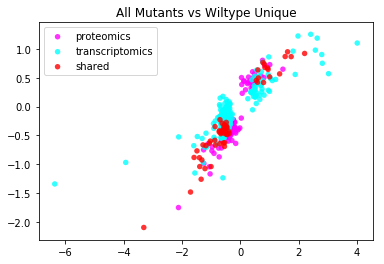

In [256]:
p_unique = (all_unique.loc[all_unique['Sig_Loc'] == 'Proteomics', 'Transcriptome_Mean_Difference'], all_unique.loc[all_unique['Sig_Loc'] == 'Proteomics', 'Proteome_Mean_Difference'])
t_unique = (all_unique.loc[all_unique['Sig_Loc'] == 'Transcriptomics', 'Transcriptome_Mean_Difference'], all_unique.loc[all_unique['Sig_Loc'] == 'Transcriptomics', 'Proteome_Mean_Difference'])
shared = (all_shared['Transcriptome_Mean_Difference'], all_shared['Proteome_Mean_Difference'])

data = (p_unique, t_unique, shared)
colors = ('magenta', 'cyan', 'red')
groups = ('proteomics', 'transcriptomics', 'shared')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.title('All Mutants vs Wiltype Unique')
plt.legend(loc=2)
plt.show()

## Hotspot TP53 Mutations vs Wildtype Analysis

### Significant proteins that are significant in only one data set

In [257]:
# Creating a list for the unique correlations in TP53 hotspot mutants vs wildtype analysis
hotspot_mut_prot_array = np.array(['ABT1', 'AP1M2', 'ARFIP2', 'AURKA', 'CAD', 'CIP2A', 'DLGAP5', 'ECT2', 'ESF1', 'FBXO22', 'FBXO3', 'GPATCH1', 'GRB7', 'HMCES', 'MTHFD2', 'NOL11', 'NOL7', 'NUP153', 'PAK2', 'PRRC2A', 'PSMD5', 'PTPN2', 'RAD54L2', 'RCC2', 'RIF1', 'RRP1B', 'SMG1', 'SNX7', 'SP110', 'STAT2', 'SUPT6H', 'TOPBP1', 'TPX2', 'TRMT6', 'USP39', 'UTP4', 'VPS25', 'ZCCHC17'])
hotspot_mut_tran_array = np.array(['ABCF1', 'ABCF3', 'ABHD16B', 'ABHD18', 'ADRM1', 'ALG2', 'ANKHD1-EIF4EBP3', 'ANKRD27', 'ANXA2P1', 'ARFGAP1', 'ARFRP1', 'ARSD', 'ATP2C2', 'BABAM1', 'BAK1', 'BBS4', 'BYSL', 'C9orf152', 'CABLES2', 'COLCA1', 'CSTF1', 'CYB5D2', 'DCAF15', 'DDX27', 'DNAJC5', 'DTX3L', 'EPS8', 'ERICH3', 'FAAP24', 'FNDC7', 'FOXA2', 'FSD1', 'FTHL17', 'FYTTD1', 'GID8', 'GMEB2', 'GTPBP3', 'IFIT1', 'IL20RA', 'KBTBD4', 'KIAA1324', 'KIAA2026', 'KIF27', 'KLHDC7A', 'KPNA1', 'LNP1', 'LOC101927391', 'LOC392232', 'MANSC1', 'MAP6D1', 'MARVELD2', 'MAST1', 'MDM2', 'MEIOB', 'MGME1', 'MIR17HG', 'MRGBP', 'MTG2', 'NCBP2', 'NGDN', 'NOP56', 'NPBWR2', 'NPDC1', 'OR5H2', 'OR5H6', 'PARL', 'PDCD5', 'PDRG1', 'PEPD', 'PFDN4', 'PGR', 'PGR-AS1', 'PHKB', 'PIK3R4', 'PLA2G10', 'PLPP2', 'PRPF6', 'PSMA7', 'PSMD2', 'RBM42', 'RPS21', 'RSAD2', 'SBF2', 'SECISBP2', 'SENP5', 'SGCB', 'SMIM13', 'SORBS2', 'SPATA18', 'SPDEF', 'SS18L1', 'SZRD1', 'TBL1XR1', 'TFG', 'TIGD4', 'TIRAP', 'TLE2', 'TMEM41A', 'TNP2', 'TOX3', 'TRAIP', 'TRPC4AP', 'UCKL1', 'USE1', 'VAPB', 'WDR53', 'WRNIP1', 'ZNF343', 'ZNF512B', 'ZNF850', 'ZNFX1'])
 
# Ensuring that the list of significant proteins have data in both the proteomics and transcriptomics dataframe    
hotspot_mut_prot_list = list()
for protein in hotspot_mut_prot_array:
    if protein in proteomics.columns and protein in transcriptomics.columns:
        hotspot_mut_prot_list.append(protein)
    hotspot_mut_prot_array = np.array(hotspot_mut_prot_list)
    
hotspot_mut_tran_list = list()
for protein in hotspot_mut_tran_array:
    if protein in proteomics.columns and protein in transcriptomics.columns:
        hotspot_mut_tran_list.append(protein)
    hotspot_mut_tran_array = np.array(hotspot_mut_tran_list)
    
hotspot_unique_array = np.concatenate((hotspot_mut_prot_array, hotspot_mut_tran_array))

In [258]:
# Creating dataframes for the unique proteins in hotspot mutants vs wildtype for both the proteome and transcriptome
hotspot_unique = pd.DataFrame({'Protein':hotspot_mut_unique_array})
hotspot_unique = hotspot_unique.set_index('Protein')
hotspot_unique.loc[hotspot_mut_prot_array, 'Sig_Loc'] = 'Proteomics'
hotspot_unique.loc[hotspot_mut_tran_array, 'Sig_Loc'] = 'Transcriptomics'
hotspot_unique = hotspot_unique.reset_index()

In [259]:
for protein in hotspot_unique_array:
    proteome_data = CPTAC.compare_mutations(proteomics, protein, gene)
    transcriptome_data = CPTAC.compare_mutations(transcriptomics, protein, gene)
    # Renaming columns to relfect where the data is from (proteome or transcriptome) for the given protein
    proteome_data.columns = ['Proteome', 'Mutation', 'Sample_Status']
    transcriptome_data.columns = ['Transcriptome', 'Mutation', 'Sample_Status']
    all_data = proteome_data.join(transcriptome_data['Transcriptome'])
    all_data.loc[all_data['Sample_Status'] == 'Tumor', 'Mutation_Type'] = 'Non_Hotspot'
    all_data.loc[hotspot_patients, 'Mutation_Type'] = 'Hotspot'
    all_data.loc[all_data['Mutation'] == 'Wildtype_Tumor', 'Mutation_Type'] = 'Wildtype'
    all_data = all_data.loc[all_data['Sample_Status'] == 'Tumor'].dropna(axis=0)
    
    # Gathering mean value difference from the transcriptomics data
    t_mut_mean = all_data.loc[all_data['Mutation_Type'] == 'Hotspot', 'Transcriptome'].mean()
    t_wt_mean = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Transcriptome'].mean()
    t_dif = t_wt_mean - t_mut_mean
    hotspot_unique.loc[hotspot_unique['Protein'] == protein, 'Transcriptome_Mean_Difference'] = t_dif
    # Gathering p-value from the transcriptomics data
    t_mut_tt = all_data.loc[all_data['Mutation_Type'] == 'Hotspot', 'Transcriptome']
    t_wt_tt = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Transcriptome']
    t_tt = scipy.stats.ttest_ind(t_wt_tt, t_mut_tt)
    hotspot_unique.loc[hotspot_unique['Protein'] == protein, 'Transcriptome_pvalue'] = t_tt[1]
    
    # Gathering mean value difference from the proteomics data
    p_mut_mean = all_data.loc[all_data['Mutation_Type'] == 'Hotspot', 'Proteome'].mean()
    p_wt_mean = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Proteome'].mean()
    p_dif = p_wt_mean - p_mut_mean
    hotspot_unique.loc[hotspot_unique['Protein'] == protein, 'Proteome_Mean_Difference'] = p_dif
    #Gathering p-value from the proteomics data
    p_mut_tt = all_data.loc[all_data['Mutation_Type'] == 'Hotspot', 'Proteome']
    p_wt_tt = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Proteome']
    p_tt = scipy.stats.ttest_ind(t_wt_tt, t_mut_tt)
    hotspot_unique.loc[hotspot_unique['Protein'] == protein, 'Proteome_pvalue'] = p_tt[1]
    

### Significant proteins that are significant in both data sets

In [260]:
#Creating arrays for the shared correlations in both directions for TP53 hotspot mutants vs wildtype    
hotspot_mut_shared_pos_array = np.array(['CMSS1', 'CMTR1', 'EIF2AK2', 'HELZ2', 'IFIT2', 'LSG1', 'LSM14B', 'OGFR', 'OSBPL2', 'PKN1', 'RAE1', 'RTF2', 'SENP2', 'SLC4A1AP', 'STAT1', 'TPD52L2', 'XPO5', 'YTHDF1', 'ZGPAT'])
hotspot_mut_shared_neg_array = np.array(['GALNT10', 'PTPN3', 'TRIM2'])

hotspot_mut_shared_pos_list = list()
for protein in hotspot_mut_shared_pos_array:
    if protein in proteomics.columns and protein in transcriptomics.columns:
        hotspot_mut_shared_pos_list.append(protein)
    hotspot_mut_shared_pos_array = np.array(hotspot_mut_shared_pos_list)
    
hotspot_mut_shared_neg_list = list()
for protein in hotspot_mut_shared_neg_array:
    if protein in proteomics.columns and protein in transcriptomics.columns:
        hotspot_mut_shared_neg_list.append(protein)
    hotspot_mut_shared_neg_array = np.array(hotspot_mut_shared_neg_list)
    
hotspot_shared_array = np.concatenate((hotspot_mut_shared_pos_array, hotspot_mut_shared_neg_array))

In [261]:
# Creating dataframes for the shared proteins in TP53 mutants vs wildtype between the proteome and transcriptome
hotspot_shared = pd.DataFrame({'Protein':hotspot_shared_array})
hotspot_shared = hotspot_shared.set_index('Protein')
hotspot_shared.loc[hotspot_mut_shared_pos_array, 'Direction'] = 'Positive'
hotspot_shared.loc[hotspot_mut_shared_neg_array, 'Direction'] = 'Negative'
hotspot_shared = hotspot_shared.reset_index()

In [262]:
for protein in hotspot_shared_array:
    proteome_data = CPTAC.compare_mutations(proteomics, protein, gene)
    transcriptome_data = CPTAC.compare_mutations(transcriptomics, protein, gene)
    # Renaming columns to relfect where the data is from (proteome or transcriptome) for the given protein
    proteome_data.columns = ['Proteome', 'Mutation', 'Sample_Status']
    transcriptome_data.columns = ['Transcriptome', 'Mutation', 'Sample_Status']
    all_data = proteome_data.join(transcriptome_data['Transcriptome'])
    all_data.loc[all_data['Sample_Status'] == 'Tumor', 'Mutation_Type'] = 'Non_Hotspot'
    all_data.loc[hotspot_patients, 'Mutation_Type'] = 'Hotspot'
    all_data.loc[all_data['Mutation'] == 'Wildtype_Tumor', 'Mutation_Type'] = 'Wildtype'
    all_data = all_data.loc[all_data['Sample_Status'] == 'Tumor'].dropna(axis=0)
    
    # Gathering mean value difference from the transcriptomics data
    t_mut_mean = all_data.loc[all_data['Mutation_Type'] == 'Hotspot', 'Transcriptome'].mean()
    t_wt_mean = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Transcriptome'].mean()
    t_dif = t_wt_mean - t_mut_mean
    hotspot_shared.loc[hotspot_shared['Protein'] == protein, 'Transcriptome_Mean_Difference'] = t_dif
    # Gathering p-value from the transcriptomics data
    t_mut_tt = all_data.loc[all_data['Mutation_Type'] == 'Hotspot', 'Transcriptome']
    t_wt_tt = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Transcriptome']
    t_tt = scipy.stats.ttest_ind(t_wt_tt, t_mut_tt)
    hotspot_shared.loc[hotspot_shared['Protein'] == protein, 'Transcriptome_pvalue'] = t_tt[1]
    
    # Gathering mean value difference from the proteomics data
    p_mut_mean = all_data.loc[all_data['Mutation_Type'] == 'Hotspot', 'Proteome'].mean()
    p_wt_mean = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Proteome'].mean()
    p_dif = p_wt_mean - p_mut_mean
    hotspot_shared.loc[hotspot_shared['Protein'] == protein, 'Proteome_Mean_Difference'] = p_dif
    #Gathering p-value from the proteomics data
    p_mut_tt = all_data.loc[all_data['Mutation_Type'] == 'Hotspot', 'Proteome']
    p_wt_tt = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Proteome']
    p_tt = scipy.stats.ttest_ind(t_wt_tt, t_mut_tt)
    hotspot_shared.loc[hotspot_shared['Protein'] == protein, 'Proteome_pvalue'] = p_tt[1]
    

### Scatter plot showing mean difference of transcriptome data (x-axis) vs. mean difference of proteome data (y-axis)

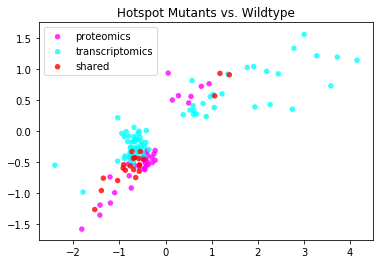

In [263]:
p_unique = (hotspot_unique.loc[hotspot_unique['Sig_Loc'] == 'Proteomics', 'Transcriptome_Mean_Difference'], hotspot_unique.loc[hotspot_unique['Sig_Loc'] == 'Proteomics', 'Proteome_Mean_Difference'])
t_unique = (hotspot_unique.loc[hotspot_unique['Sig_Loc'] == 'Transcriptomics', 'Transcriptome_Mean_Difference'], hotspot_unique.loc[hotspot_unique['Sig_Loc'] == 'Transcriptomics', 'Proteome_Mean_Difference'])
shared = (hotspot_shared['Transcriptome_Mean_Difference'], hotspot_shared['Proteome_Mean_Difference'])

data = (p_unique, t_unique, shared)
colors = ('magenta', 'cyan', 'red')
groups = ('proteomics', 'transcriptomics', 'shared')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.title('Hotspot Mutants vs. Wildtype')
plt.legend(loc=2)
plt.show()

## Non-Hotspot TP53 Mutations vs Wildtype Analysis

### Significant proteins that are significant in only one data set


In [264]:
# Creating a list for the unique correlations in TP53 non-nonhs mutants vs wildtype analysis
nonhs_mut_prot_array = np.array(['BIRC2', 'COPS4', 'FASTKD5', 'FXR1', 'GEMIN2', 'GFM1', 'GRB7', 'GXYLT1', 'HELZ2', 'MTHFD2', 'NGDN', 'NOL10', 'PRRC2A', 'RBBP6', 'SLC4A1AP', 'TRMT6', 'VAV2', 'WDR75'])
nonhs_mut_tran_array = np.array(['AADACL3', 'ABCF1', 'ABCF3', 'ADAM18', 'AEN', 'ANKHD1-EIF4EBP3', 'ANKLE1', 'CCDC124', 'CDK5RAP1', 'CHD8', 'CHRAC1', 'CMTR1', 'CSNK2A1', 'CTCFL', 'CYB5D2', 'DERL1', 'DHX16', 'DIS3L', 'DNAJB11', 'DNMBP', 'ECPAS', 'ERI3', 'FGF21', 'FKBP8', 'GGCX', 'GID8', 'GTF3C2', 'HNF4G', 'HPDL', 'IDE', 'IDH3B', 'KLHDC3', 'KPNA1', 'LEMD2', 'LINC01111', 'LINC01980', 'LINC01981', 'LINC02548', 'LOC100421746', 'LOC101928978', 'LOC399815', 'MCM8', 'MED20', 'MIS18A', 'MNX1', 'MRGBP', 'MRPL2', 'MTBP', 'MTG2', 'NCBP2-AS2', 'NLRP10', 'NPBWR2', 'NPDC1', 'NSMCE2', 'PARL', 'PEPD', 'POLDIP3', 'PRDM9', 'PRPF6', 'RAE1', 'RNF26', 'RNF41', 'RPP40', 'RPRD1B', 'RPS27L', 'SENP2', 'SENP5', 'SHKBP1', 'SIAE', 'STX17', 'SUMO3', 'TAF11', 'TBC1D22B', 'TPD52L2', 'TRIM13', 'TRIM39', 'TTC38', 'WDR53', 'ZFAT', 'ZGPAT', 'ZIC3', 'ZNF679', 'ZPBP2'])

# Ensuring that the list of significant proteins have data in both the proteomics and transcriptomics dataframe    
nonhs_mut_prot_list = list()
for protein in nonhs_mut_prot_array:
    if protein in proteomics.columns and protein in transcriptomics.columns:
        nonhs_mut_prot_list.append(protein)
    nonhs_mut_prot_array = np.array(nonhs_mut_prot_list)
    
nonhs_mut_tran_list = list()
for protein in nonhs_mut_tran_array:
    if protein in proteomics.columns and protein in transcriptomics.columns:
        nonhs_mut_tran_list.append(protein)
    nonhs_mut_tran_array = np.array(nonhs_mut_tran_list)
    
nonhs_unique_array = np.concatenate((nonhs_mut_prot_array, nonhs_mut_tran_array))

In [265]:
# Creating dataframes for the unique proteins in nonhs mutants vs wildtype for both the proteome and transcriptome
nonhs_unique = pd.DataFrame({'Protein':nonhs_mut_unique_array})
nonhs_unique = nonhs_unique.set_index('Protein')
nonhs_unique.loc[nonhs_mut_prot_array, 'Sig_Loc'] = 'Proteomics'
nonhs_unique.loc[nonhs_mut_tran_array, 'Sig_Loc'] = 'Transcriptomics'
nonhs_unique = nonhs_unique.reset_index()

In [266]:
for protein in nonhs_unique_array:
    proteome_data = CPTAC.compare_mutations(proteomics, protein, gene)
    transcriptome_data = CPTAC.compare_mutations(transcriptomics, protein, gene)
    # Renaming columns to relfect where the data is from (proteome or transcriptome) for the given protein
    proteome_data.columns = ['Proteome', 'Mutation', 'Sample_Status']
    transcriptome_data.columns = ['Transcriptome', 'Mutation', 'Sample_Status']
    all_data = proteome_data.join(transcriptome_data['Transcriptome'])
    all_data.loc[all_data['Sample_Status'] == 'Tumor', 'Mutation_Type'] = 'Non_Hotspot'
    all_data.loc[hotspot_patients, 'Mutation_Type'] = 'Hotspot'
    all_data.loc[all_data['Mutation'] == 'Wildtype_Tumor', 'Mutation_Type'] = 'Wildtype'
    all_data = all_data.loc[all_data['Sample_Status'] == 'Tumor'].dropna(axis=0)
    
    # Gathering mean value difference from the transcriptomics data
    t_mut_mean = all_data.loc[all_data['Mutation_Type'] == 'Non_Hotspot', 'Transcriptome'].mean()
    t_wt_mean = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Transcriptome'].mean()
    t_dif = t_wt_mean - t_mut_mean
    nonhs_unique.loc[nonhs_unique['Protein'] == protein, 'Transcriptome_Mean_Difference'] = t_dif
    # Gathering p-value from the transcriptomics data
    t_mut_tt = all_data.loc[all_data['Mutation_Type'] == 'Non_Hotspot', 'Transcriptome']
    t_wt_tt = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Transcriptome']
    t_tt = scipy.stats.ttest_ind(t_wt_tt, t_mut_tt)
    nonhs_unique.loc[nonhs_unique['Protein'] == protein, 'Transcriptome_pvalue'] = t_tt[1]
    
    # Gathering mean value difference from the proteomics data
    p_mut_mean = all_data.loc[all_data['Mutation_Type'] == 'Non_Hotspot', 'Proteome'].mean()
    p_wt_mean = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Proteome'].mean()
    p_dif = p_wt_mean - p_mut_mean
    nonhs_unique.loc[nonhs_unique['Protein'] == protein, 'Proteome_Mean_Difference'] = p_dif
    #Gathering p-value from the proteomics data
    p_mut_tt = all_data.loc[all_data['Mutation_Type'] == 'Non_Hotspot', 'Proteome']
    p_wt_tt = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Proteome']
    p_tt = scipy.stats.ttest_ind(t_wt_tt, t_mut_tt)
    nonhs_unique.loc[nonhs_unique['Protein'] == protein, 'Proteome_pvalue'] = p_tt[1]

### Significant proteins that are significant in both data sets

In [267]:
# Creating arrays for the shared correlations in both directions for TP53 non-nonhs mutants vs wildtype
nonhs_mut_shared_pos_array = np.array(['CDKAL1', 'LSG1', 'STAT2'])
nonhs_mut_shared_neg_array = np.array(['KIF13B', 'SNX7', 'VPS13C'])

nonhs_mut_shared_pos_list = list()
for protein in nonhs_mut_shared_pos_array:
    if protein in proteomics.columns and protein in transcriptomics.columns:
        nonhs_mut_shared_pos_list.append(protein)
    nonhs_mut_shared_pos_array = np.array(nonhs_mut_shared_pos_list)
    
nonhs_mut_shared_neg_list = list()
for protein in nonhs_mut_shared_neg_array:
    if protein in proteomics.columns and protein in transcriptomics.columns:
        nonhs_mut_shared_neg_list.append(protein)
    nonhs_mut_shared_neg_array = np.array(nonhs_mut_shared_neg_list)
    
nonhs_shared_array = np.concatenate((nonhs_mut_shared_pos_array, nonhs_mut_shared_neg_array))

In [268]:
# Creating dataframes for the shared proteins in TP53 mutants vs wildtype between the proteome and transcriptome
nonhs_shared = pd.DataFrame({'Protein':nonhs_shared_array})
nonhs_shared = nonhs_shared.set_index('Protein')
nonhs_shared.loc[nonhs_mut_shared_pos_array, 'Direction'] = 'Positive'
nonhs_shared.loc[nonhs_mut_shared_neg_array, 'Direction'] = 'Negative'
nonhs_shared = nonhs_shared.reset_index()

In [269]:
for protein in nonhs_shared_array:
    proteome_data = CPTAC.compare_mutations(proteomics, protein, gene)
    transcriptome_data = CPTAC.compare_mutations(transcriptomics, protein, gene)
    # Renaming columns to relfect where the data is from (proteome or transcriptome) for the given protein
    proteome_data.columns = ['Proteome', 'Mutation', 'Sample_Status']
    transcriptome_data.columns = ['Transcriptome', 'Mutation', 'Sample_Status']
    all_data = proteome_data.join(transcriptome_data['Transcriptome'])
    all_data.loc[all_data['Sample_Status'] == 'Tumor', 'Mutation_Type'] = 'Non_Hotspot'
    all_data.loc[hotspot_patients, 'Mutation_Type'] = 'Hotspot'
    all_data.loc[all_data['Mutation'] == 'Wildtype_Tumor', 'Mutation_Type'] = 'Wildtype'
    all_data = all_data.loc[all_data['Sample_Status'] == 'Tumor'].dropna(axis=0)
    
    # Gathering mean value difference from the transcriptomics data
    t_mut_mean = all_data.loc[all_data['Mutation_Type'] == 'Non_Hotspot', 'Transcriptome'].mean()
    t_wt_mean = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Transcriptome'].mean()
    t_dif = t_wt_mean - t_mut_mean
    nonhs_shared.loc[nonhs_shared['Protein'] == protein, 'Transcriptome_Mean_Difference'] = t_dif
    # Gathering p-value from the transcriptomics data
    t_mut_tt = all_data.loc[all_data['Mutation_Type'] == 'Non_Hotspot', 'Transcriptome']
    t_wt_tt = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Transcriptome']
    t_tt = scipy.stats.ttest_ind(t_wt_tt, t_mut_tt)
    nonhs_shared.loc[nonhs_shared['Protein'] == protein, 'Transcriptome_pvalue'] = t_tt[1]
    
    # Gathering mean value difference from the proteomics data
    p_mut_mean = all_data.loc[all_data['Mutation_Type'] == 'Non_Hotspot', 'Proteome'].mean()
    p_wt_mean = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Proteome'].mean()
    p_dif = p_wt_mean - p_mut_mean
    nonhs_shared.loc[nonhs_shared['Protein'] == protein, 'Proteome_Mean_Difference'] = p_dif
    #Gathering p-value from the proteomics data
    p_mut_tt = all_data.loc[all_data['Mutation_Type'] == 'Non_Hotspot', 'Proteome']
    p_wt_tt = all_data.loc[all_data['Mutation_Type'] == 'Wildtype', 'Proteome']
    p_tt = scipy.stats.ttest_ind(t_wt_tt, t_mut_tt)
    nonhs_shared.loc[nonhs_shared['Protein'] == protein, 'Proteome_pvalue'] = p_tt[1]
    

### Scatter plot showing mean difference of transcriptome data (x-axis) vs. mean difference of proteome data (y-axis)

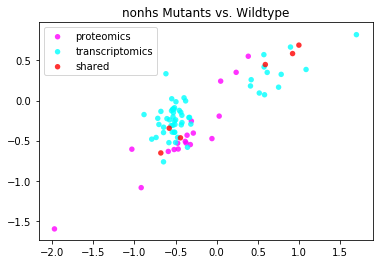

In [272]:
p_unique = (nonhs_unique.loc[nonhs_unique['Sig_Loc'] == 'Proteomics', 'Transcriptome_Mean_Difference'], nonhs_unique.loc[nonhs_unique['Sig_Loc'] == 'Proteomics', 'Proteome_Mean_Difference'])
t_unique = (nonhs_unique.loc[nonhs_unique['Sig_Loc'] == 'Transcriptomics', 'Transcriptome_Mean_Difference'], nonhs_unique.loc[nonhs_unique['Sig_Loc'] == 'Transcriptomics', 'Proteome_Mean_Difference'])
shared = (nonhs_shared['Transcriptome_Mean_Difference'], nonhs_shared['Proteome_Mean_Difference'])

data = (p_unique, t_unique, shared)
colors = ('magenta', 'cyan', 'red')
groups = ('proteomics', 'transcriptomics', 'shared')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.title('nonhs Mutants vs. Wildtype')
plt.legend(loc=2)
plt.show()

NameError: name 'py' is not defined

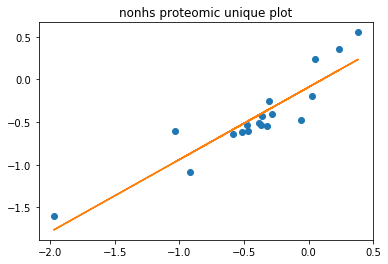

In [276]:
# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

xi = nonhs_unique.loc[nonhs_unique['Sig_Loc'] == 'Proteomics', 'Transcriptome_Mean_Difference']
y = nonhs_unique.loc[nonhs_unique['Sig_Loc'] == 'Proteomics', 'Proteome_Mean_Difference']
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
pylab.title('nonhs proteomic unique plot')
ax = plt.gca()
fig = plt.gcf()
py.plot_mpl(fig, filename='linear-Fit-with-matplotlib')